# Interaction Terms, Polynomials, and Other Transformations

## What We'll Accomplish in This Notebook

So far we've learned the basics of regression and then expanded upon them to include multiple quantitative predictors and qualitative predictors. We've also seen how we can choose from an array of predictive models using cross-validation.

In this notebook we'll continue to build up our linear regression skills with an array of techniques, specifically we'll cover:
<ul>
    <li>Interaction Terms by having a second round of beer,</li>
    <li>How to include powers of features, where you'll model data from an interview problem set,</li>
    <li>Encorporating other popular transformations by making a better advertising model,</li>
    <li>We'll end by introducing some of sklearns preprocessing tools for faster model building/testing.</li>
</ul>

Let's get going like we alway do, import the packages we'll use.

In [1]:
# import the packages we'll use
## For data handling
import pandas as pd
import numpy as np
from numpy import meshgrid

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

## Interaction Terms

Let's look at the beer data from the MLR notebook.

In [2]:
# Read in the csv
beers = pd.read_csv("beer.csv")

# train test split
beers_copy = beers.copy()

# Then locate all the stouts and set Stout to 1
beers_copy['Stout'] = 0
beers_copy.loc[beers_copy.Beer_Type == "Stout",'Stout'] = 1

beers_train = beers_copy.sample(frac=.75,random_state = 614)
beers_test = beers_copy.drop(beers_train.index)

beers_train.head()

,Beer_Name,IBU,ABV,Rating,Beer_Type,Stout
54,Shakespeare Oatmeal Stout,60,5.7,3.722,Stout,1
3,Dragon’s Milk,31,11.0,4.062,Stout,1
281,Road 2 Ruin Double IPA,78,8.0,3.836,IPA,0
292,Hercules Double IPA,85,10.0,3.831,IPA,0
345,White Rajah,70,6.8,4.015,IPA,0


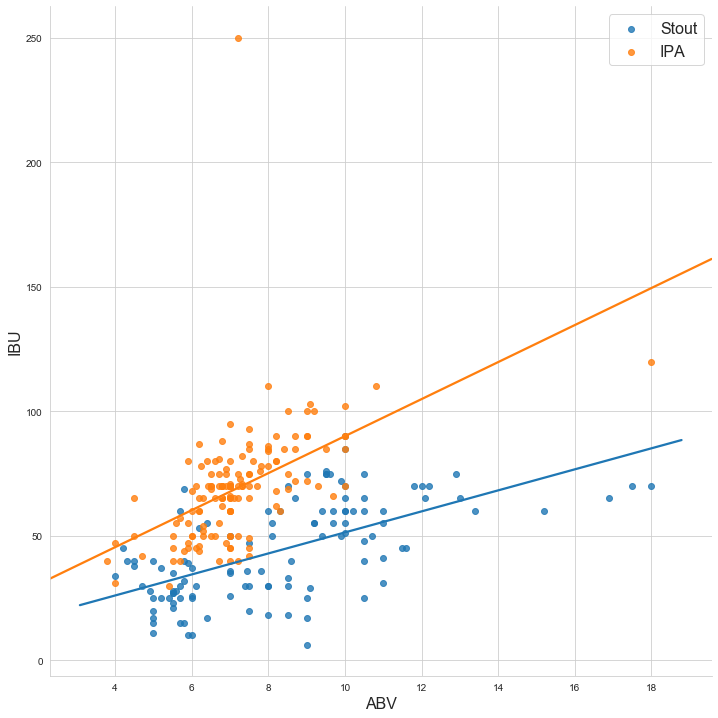

In [3]:
# now plot a regression with "hue" listed as Beer_Type
sns.lmplot(data = beers_train, x="ABV", y="IBU", 
           hue = "Beer_Type", height=10,  
           ci = False, legend=False)

plt.xlabel("ABV", fontsize=16)
plt.ylabel("IBU", fontsize=16)

plt.legend(fontsize=16)

plt.show()

`seaborn.lmplot` suggests that our regression line depends on the `Beer_Type`. Let's recall the model we fit in MLR:
$$
\text{IBU} = \beta_0 + \beta_1 \text{ABV} + \beta_2 \text{Stout} + \epsilon.
$$

Now we noted that this model only allows for different slopes for Stouts and IPAs. However if we add in the term $\beta_3 \text{Stout} \times \text{ABV}$ like so,
$$
\text{IBU} = \beta_0 + \beta_1 \text{ABV} + \beta_2 \text{Stout} + \beta_3 \text{Stout} \times \text{ABV} + \epsilon
$$

then when Stout $=0$ the slope of the line is $\beta_1$ and when Stout $=1$ the slope of the line $\beta_1 + \beta_3$. The $\text{Stout} \times \text{ABV}$ is the interaction term between Stout and ABV.

Let's make an interaction term and then fit this new model with `sklearn`.

In [4]:
# make the interaction term
beers_train['Stout_ABV'] = beers_train['Stout']*beers_train['ABV']

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
## now make and fit the model
reg = LinearRegression(copy_X = True)

reg.fit(beers_train[['ABV','Stout','Stout_ABV']],beers_train['IBU'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
print("beta_0_hat is",np.round(reg.intercept_,5))
print("beta_1_hat is",np.round(reg.coef_[0],5))
print("beta_2_hat is",np.round(reg.coef_[1],5))
print("beta_3_hat is",np.round(reg.coef_[2],5))

beta_0_hat is 15.68659
beta_1_hat is 7.43576
beta_2_hat is -6.54521
beta_3_hat is -3.213


In [8]:
# We can plot the two lines by limiting our prediction input
stout_values = np.ones((100,3))

# make the ABV values
stout_values[:,0] = np.linspace(beers_train['ABV'].min(),beers_train['ABV'].max(),100)

# now the interaction term
stout_values[:,2] = stout_values[:,0]*stout_values[:,1]

# make a stout prediction
stout_pred = reg.predict(stout_values)

# make ipa values
ipa_values = np.zeros((100,3))
ipa_values[:,0] = np.linspace(beers_train['ABV'].min(),beers_train['ABV'].max(),100)
ipa_values[:,2] = ipa_values[:,0]*ipa_values[:,1]
ipa_pred = reg.predict(ipa_values)

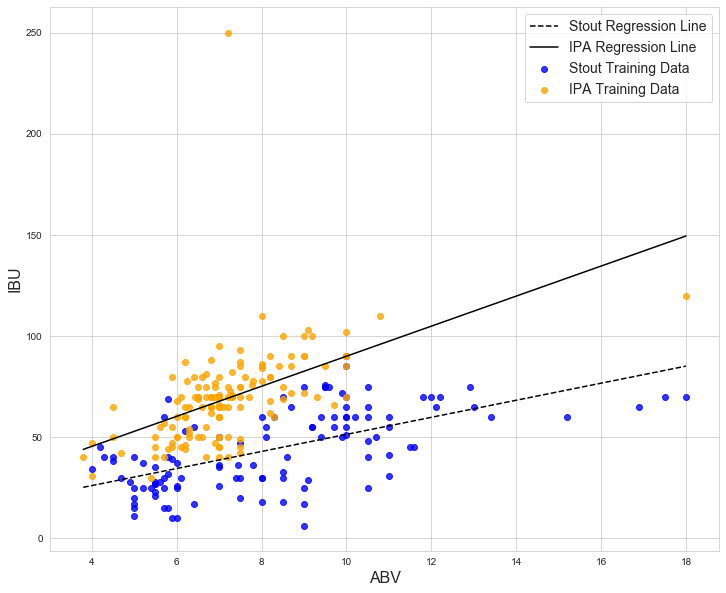

In [9]:
# Let's plot
plt.figure(figsize=(12,10))

# plot stout values
plt.scatter(beers_train.loc[beers_train.Stout == 1,'ABV'], 
               beers_train.loc[beers_train.Stout == 1,'IBU'],
               c = 'blue', alpha = .8, label="Stout Training Data")

# plot the stout line
plt.plot(stout_values[:,0], stout_pred, "k--", label="Stout Regression Line")

# plot ipa values
plt.scatter(beers_train.loc[beers_train.Stout == 0,'ABV'], 
               beers_train.loc[beers_train.Stout == 0,'IBU'],
               c = 'orange', alpha = .8, label="IPA Training Data")

# plot the ipa line
plt.plot(ipa_values[:,0], ipa_pred, "k", label="IPA Regression Line")

plt.legend(fontsize = 14)

plt.xlabel("ABV",fontsize=16)
plt.ylabel("IBU",fontsize=16)

plt.show()

Now this looks more like the `seaborn.lmplot`!

Adding interaction terms can also help with non-random residual plots as we'll see in a later example with the `Advertising` data from the MLR notebook.

## Questions

Now I'll answer one or two questions before you go practice including interaction terms.

<br>
<br>
<br>
<br>
<br>
<br>

## End of Questions

## Practice

Load the following data set called `inter`. Build a regression model regressing $y$ on $x_1$ and $x_2$.

In [10]:
inter = pd.read_csv("inter.csv")

In [11]:
## Code here













In [12]:
## Code here













In [13]:
## Code here













In [14]:
## Code here













## Polynomial Regression

Now not every relationship in the world is a line or a plane. 

Let's look at a synthetic dataset and see an example.

In [15]:
df = pd.read_csv("poly.csv")

print("There are",len(df),"observations.")
print("The columns are",df.columns)

There are 500 observations.
The columns are Index(['x1', 'x2', 'y'], dtype='object')


In [16]:
# Make the train test split
df_copy = df.copy()

df_train = df_copy.sample(frac=.75,random_state = 614)
df_test = df_copy.drop(df_train.index)

In [17]:
df_train.head()

,x1,x2,y
219,2.289796,0.969242,-1.645074
34,5.703718,2.225895,22.938733
271,2.822881,-1.875427,22.887059
274,6.860596,0.954968,43.949767
111,6.902944,-1.728164,56.122324


We've got three variables $x_1$, $x_2$, and $y$.

Let's use the scatter matrix to examine them.

In [18]:
from pandas.plotting import scatter_matrix

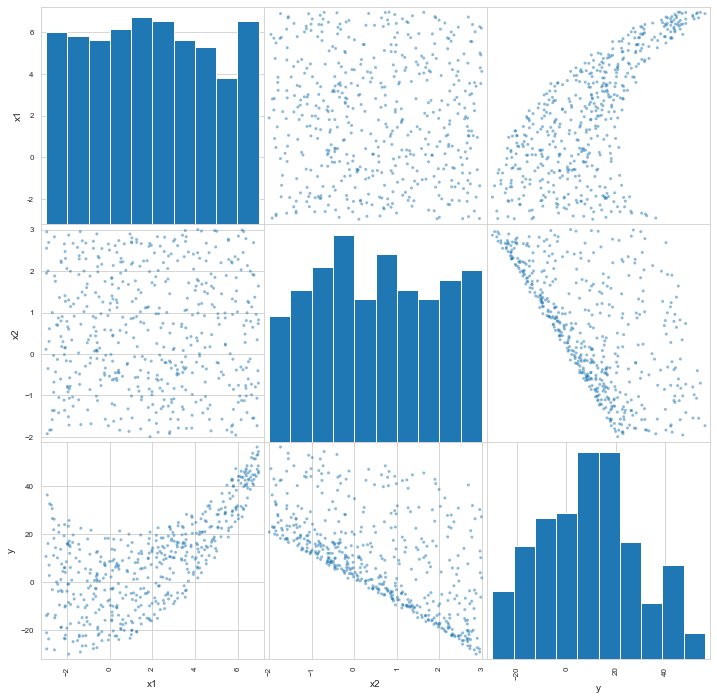

In [19]:
scatter_matrix(df,figsize=(12,12))

plt.show()

In [20]:
df.corr()

,x1,x2,y
x1,1.000000,-0.025295,0.678145
x2,-0.025295,1.000000,-0.604044
y,0.678145,-0.604044,1.000000


Now there certainly appears to be a relationship between $x_1$ and $y$ and $x_2$ and $y$. While the relationship between $x_2$ and $y$ might be linear, the relationship between $x_1$ and $y$ is definitely not linear.

One way to address this is to make a polynomial transformation of $x_1$. For instance $x_1^2$.

In [21]:
df['x1_sq'] = df['x1']**2

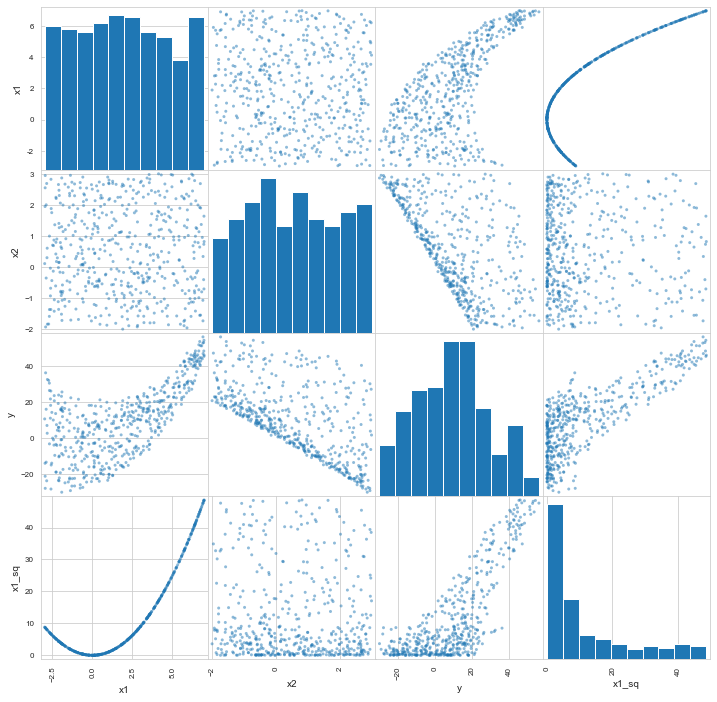

In [22]:
scatter_matrix(df, figsize=(12,12))

plt.show()

The relationship between $y$ and $x_1^2$ seems somewhat linear, let's now include it in a model:
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_1^2 + \beta_3 x_2 + \epsilon,
$$
and then we'll fit this model.

In [23]:
reg = LinearRegression(copy_X = True)

reg.fit(df[['x1','x1_sq','x2']], df['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print("beta_0_hat is",np.round(reg.intercept_,5))
print("beta_1_hat is",np.round(reg.coef_[0],5))
print("beta_2_hat is",np.round(reg.coef_[1],5))
print("beta_3_hat is",np.round(reg.coef_[2],5))

beta_0_hat is 0.87026
beta_1_hat is 0.44236
beta_2_hat is 1.01126
beta_3_hat is -7.99689


In [25]:
# Let's examine the residual plot
pred = reg.predict(df[['x1','x1_sq','x2']])

res = df['y'] - pred

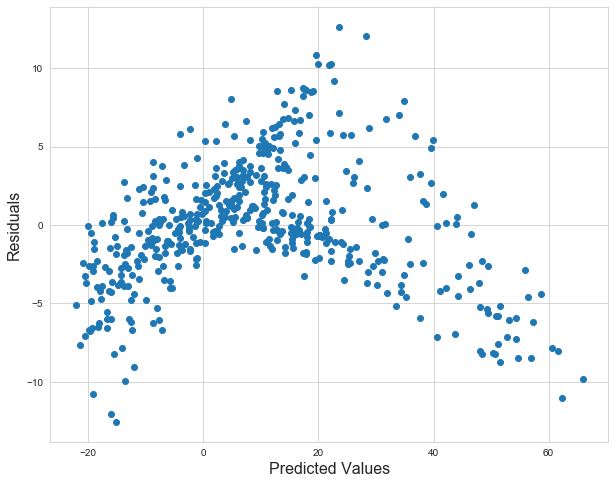

In [26]:
plt.figure(figsize = (10,8))

plt.scatter(pred,res)

plt.xlabel("Predicted Values", fontsize=16)
plt.ylabel("Residuals", fontsize=16)

plt.show()

Definitely not random!

A residual plot indicates that there is some signal in the data not being captured by our model. One way to address this is to add an interaction term. Let's try adding in $x_1 x_2$, so our model becomes:
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_1^2 + \beta_3 x_2 + \beta_4 x_1 x_2 + \epsilon
$$

In [27]:
# First add the interaction term to the df
df['x1_x2'] = df['x1']*df['x2']

In [28]:
reg = LinearRegression(copy_X = True)

reg.fit(df[['x1','x1_sq','x2','x1_x2']], df['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print("beta_0_hat is",np.round(reg.intercept_,5))
print("beta_1_hat is",np.round(reg.coef_[0],5))
print("beta_2_hat is",np.round(reg.coef_[1],5))
print("beta_3_hat is",np.round(reg.coef_[2],5))
print("beta_4_hat is",np.round(reg.coef_[3],5))

beta_0_hat is 1.94617
beta_1_hat is -0.05965
beta_2_hat is 1.01366
beta_3_hat is -9.93009
beta_4_hat is 0.96633


In [30]:
# Let's re-examine the residual plot
pred = reg.predict(df[['x1','x1_sq','x2','x1_x2']])

res = df['y'] - pred

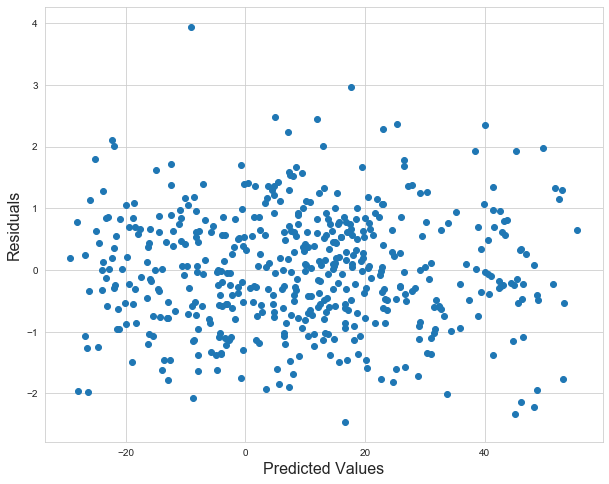

In [31]:
plt.figure(figsize = (10,8))

plt.scatter(pred,res)

plt.xlabel("Predicted Values", fontsize=16)
plt.ylabel("Residuals", fontsize=16)

plt.show()

So much better!

### Which is the Better Model?

This seems to be the best model for the data from inspecting the scatter plots, and checking on the residual plot. However, we could have performed cross-validation to see which of the two models has the lower cv average MSE. We won't do that here, but just be aware that is one way you could find the better predictive model.

You may also wonder how we knew to stop at $x_1^2$, well we didn't! We could have continued on to $x_1^4$ and so on, but in general it is best to add as little to the model as you can get away with. We'll see why this is the case in the Bias Variance Tradeoff Notebook soon.

### Do I Need to Include it?

If you notice the coefficient on $x_1$ is close to $0$ in the interaction term model. It may be tempting to remove this feature from the model especially if the true relationship was:
$$
y = 2 + x1^2 - 10 x_2 + x_1 x_2.
$$
However, there is no way for you to know ahead of time what the true relationship is between the target and the features, if there was there'd be no need for regression. 

To further illustrate this point, imagine the true relationship was such that:
$$
y \propto x_1^2,
$$
if we do not include $x_1$ in our model we are limiting ourselves to parabolas of the form
$$
\beta_0 + \beta_1 x^2,
$$
which leaves out a number of possible parabolas.

It is important to remember that anytime you make a model that includes a polynomial transformation you need to include all of the lesser powers as well. So with $x_1^2$ as the highest power you'd need to include $x_1$, with $x_1^3$ as the highest power you'd need to include $x_1^2$ and $x_1$, and so on for $x_1^n$.

This also holds for interaction terms. If you include $x_1 x_2$ you need to include both $x_1$ and $x_2$ as predictors as well.

## Questions

Again we'll take a couple of questions then time for another breakout session.

<br>
<br>
<br>
<br>
<br>
<br>
<br>

## Question Time is Over

## Practice

The data labeled `df` below came from a job interview problem set. Eventually you'll have to build the best predictive model you can on the data. For now examine the relationship between `y` and `x1`. Build a model to predict `y` using `x1`.

In [32]:
df = pd.read_csv("PredictiveModelingAssessmentData.csv")

In [33]:
## Code here













In [34]:
## Code here













In [35]:
## Code here













In [36]:
## Code here













In [37]:
## Code here













## Other Popular Transformations

We can add in more than just polynomials. There are other popular transformations including $\log$s, roots, $\sin$, $\cos$, $\tan$, exponentials, and more.

We'll work through an example returning to our `Advertising` data then you'll finish making a model for the interview data.

In [38]:
# Read in the data
ads = pd.read_csv("Advertising.csv")

In [39]:
# Make the train test split
ads_copy = ads.copy()

# Set aside 25% of the data
# make 614 the random_state because I live in Columbus
ads_train = ads_copy.sample(frac = .75, random_state = 614)
ads_test = ads_copy.drop(ads_train.index)

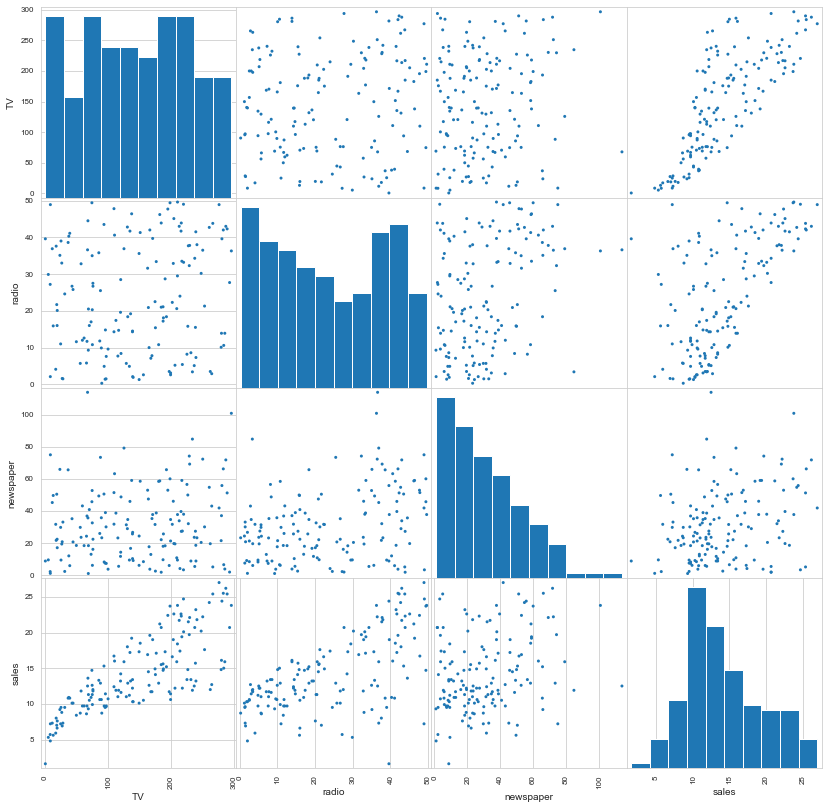

In [40]:
# first input the dataframe you want to see a 
# scatter matrix for
# then enter figsize and other plotting arguments
scatter_matrix(ads_train, figsize = (14,14), alpha = 1)

plt.show()

Looking at the `TV` vs `sales` plot in the bottom left corner it looks like the relationship might not be linear. However let's look at a plot of `sales` vs root `TV`.

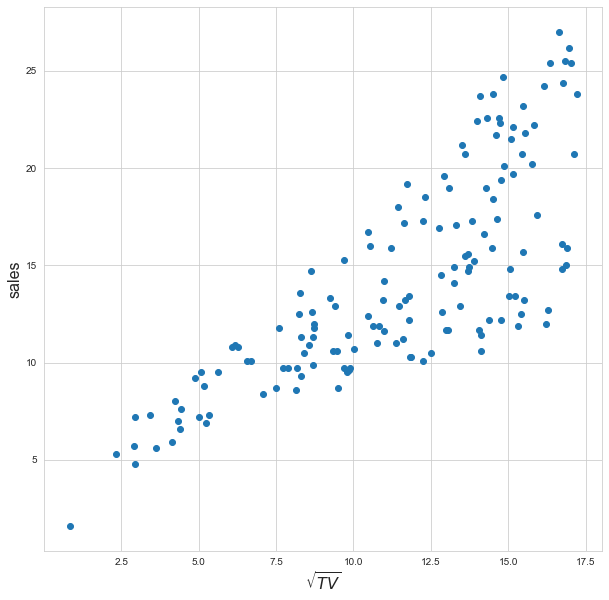

In [41]:
plt.figure(figsize = (10,10))

plt.scatter(np.sqrt(ads_train.TV),ads_train.sales)

plt.xlabel("$\sqrt{TV}$", fontsize = 16)
plt.ylabel("sales", fontsize = 16)

plt.show()

This looks much more linear. Let's replace `TV` in our model from Notebook 3 with root `TV`.
$$
\text{sales} = \beta_0 + \beta_1 \sqrt{\text{TV}} + \beta_2 \text{radio} + \epsilon
$$

In [42]:
# Add in root tv to the df
ads_train['sqrt_TV'] = np.sqrt(ads_train.TV)

In [43]:
# Make the model object
reg = LinearRegression(copy_X = True)

In [44]:
# Fit the data
reg.fit(ads_train[['sqrt_TV','radio']],ads_train['sales'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
print("beta_0_hat is",np.round(reg.intercept_,5))
print("beta_1_hat is",np.round(reg.coef_[0],5))
print("beta_2_hat is",np.round(reg.coef_[1],5))

beta_0_hat is -1.87435
beta_1_hat is 0.99493
beta_2_hat is 0.19936


In [46]:
# Look at the residual plot
pred = reg.predict(ads_train[['sqrt_TV','radio']])

res = ads_train['sales'] - pred

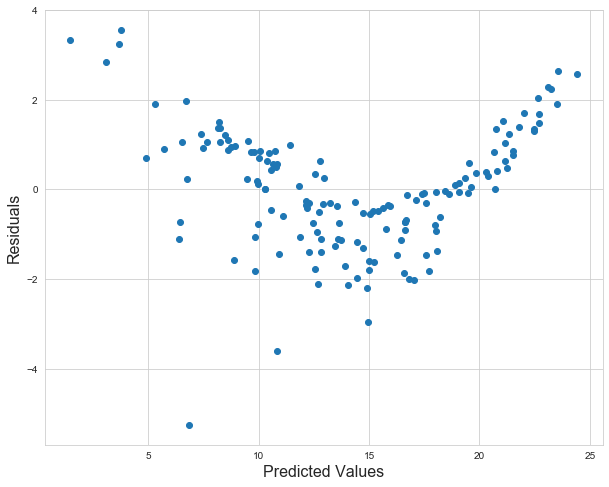

In [47]:
plt.figure(figsize = (10,8))

plt.scatter(pred,res)

plt.xlabel("Predicted Values", fontsize=16)
plt.ylabel("Residuals", fontsize=16)

plt.show()

Again not random. Let's add in the interaction term.

In [48]:
ads_train['sqrtTV_radio'] = ads_train['sqrt_TV'] * ads_train['radio']

In [49]:
# Make the model object
reg = LinearRegression(copy_X = True)

In [50]:
# Fit the data
reg.fit(ads_train[['sqrt_TV','radio','sqrtTV_radio']],ads_train['sales'])

# We'll want to look at these later
print(reg.coef_)

[ 0.42482823 -0.05805476  0.02208906]


In [51]:
# Let's re-examine the residual plot
pred = reg.predict(ads_train[['sqrt_TV','radio','sqrtTV_radio']])

res = ads_train['sales'] - pred

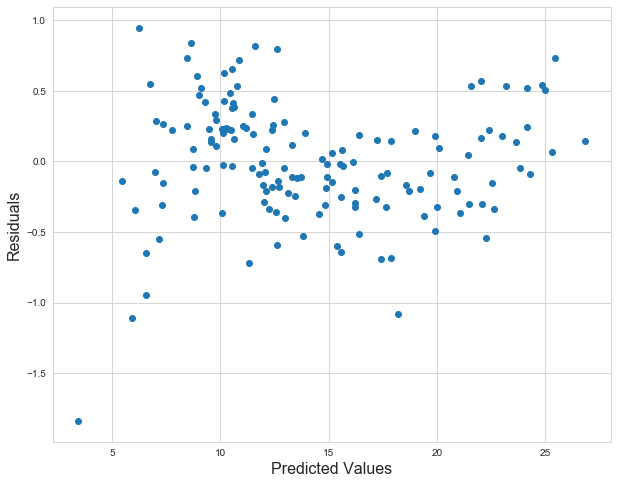

In [52]:
plt.figure(figsize = (10,8))

plt.scatter(pred,res)

plt.xlabel("Predicted Values", fontsize=16)
plt.ylabel("Residuals", fontsize=16)

plt.show()

Not perfect, but much better than before!

Let's go with this as our model:
$$
\text{sales} = \beta_0 + \beta_1 \sqrt{\text{TV}} + \beta_2 \text{radio} + \beta_3 \sqrt{\text{TV}} \times \text{radio} + \epsilon
$$
and use cross-validation to compare the predictive performance of this model in comparison to model we settled on in Notebook 3.

In [53]:
# import the KFold object from sklearn
from sklearn.model_selection import KFold

# We'll need this when we fit models
from sklearn.base import clone

In [54]:
# The features used in notebook 3
nb3_feats = ['TV','radio']

# The features used here
nb4_feats = ['sqrt_TV','radio','sqrtTV_radio']

models = [nb3_feats, nb4_feats]

In [55]:
## Copying functions from notebook 3

# This gets our data for us
def get_X_y(df,features,target):
    # Returns X then y
    return np.array(df[features]), np.array(df[target])

# this calculates the mse
def get_mse(model, X, y):
    # get the prediction
    pred = model.predict(X)
    
    # Returns the mse
    return np.sum(np.power(pred-y,2))/len(y)

In [56]:
# Now make an array that will hold the mses
# for both models
# the columns represent each model
MSEs = np.empty((5,2))

In [57]:
# Make the kfold object
kfold = KFold(n_splits = 5, shuffle = True, random_state = 440)

# Make a regression model
reg = LinearRegression(copy_X = True)

In [58]:
# For each possible model
for j in range(len(models)):
    # get X and y
    X, y = get_X_y(ads_train, models[j], 'sales')

    # keep track of what split we're on
    i = 0
    
    # Perform CV
    for train_index, test_index in kfold.split(X):
        # Get the cv train test split
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Cloning the regression makes a fresh regression 
        # model for each run
        clone_reg = clone(reg)
        
        # fit the model
        clone_reg.fit(X_train,y_train)
        
        MSEs[i,j] = get_mse(clone_reg, X_test, y_test)
        
        i = i + 1

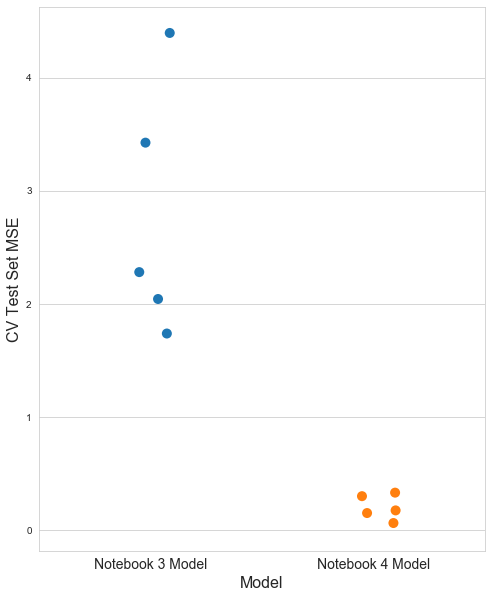

In [59]:
# lets compare the MSEs for each model
mse_df = pd.DataFrame({'nb3_model':MSEs[:,0],'nb4_model':MSEs[:,1]})

plt.figure(figsize = (8,10))

# a strip plot just puts the points with some jittering
# in a vertical strip, note strip can be horizontal
# if you input the x = 'column' argument
ax = sns.stripplot(data=mse_df, s=10)

plt.xlabel("Model", fontsize=16)
plt.ylabel("CV Test Set MSE", fontsize = 16)

ax.set_xticklabels(["Notebook 3 Model", "Notebook 4 Model"],  fontsize = 14)

plt.show()

The model with the root and interaction terms we made in this notebook seems unequivocally better based on the cross validation outcome.

## Questions

Again we'll answer a couple of questions then it is your turn.

<br>
<br>
<br>
<br>
<br>

## End of Question Time

## Practice

Return to the dataset from an interview problem set. Using everything we've learned in this notebook try to make the best predicitve model you can. Determine this using cross-validation.

Hint(s): The absolute lowest you can make the root mean square error is $1$ and you may want to consider using one of the non-polynomial transformations for $x_2$.

In [ ]:
## Code here













In [ ]:
## Code here













In [ ]:
## Code here













In [ ]:
## Code here













In [ ]:
## Code here













In [ ]:
## Code here













## `sklearn` for Preprocessing Data

Now we've introduced a lot of data manipulation in this notebook. This can become quite tiresome and messy when we want to reread our code later.

Luckily `sklearn` offers a number of preprocessing tools to make our code cleaner and easier to follow. We'll introduce `PolynomialFeatures`, `FunctionTransformer`, and `Pipeline`.

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

### `PolynomialFeatures`

We'll start with `PolynomialFeatures`. This is handy when we want to add in powers of features and interaction terms.

We'll work with the following array with the features `x1` and `x2` in columns `0` and `1` respectively.

In [61]:
# our Array
X = np.random.randint(0,11,[10,2])

X

array([[ 8,  6],
       [ 1,  0],
       [ 6, 10],
       [ 8,  3],
       [ 9,  4],
       [10, 10],
       [ 6,  7],
       [10,  1],
       [ 0,  0],
       [ 0,  6]])

In [62]:
# make a PolynomialFeatures object
# We want all degree 2 combinations of the features entered
# interaction_only can be True if you only want interaction terms
# include_bias adds in a column of ones if True
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

In [63]:
# fit_transform fits the preprocesser and then transforms the data
# I've printed out the columns we produce
print(["x1","x2","x1_sq","x1_x2","x2_sq"])
print(poly.fit_transform(X))

['x1', 'x2', 'x1_sq', 'x1_x2', 'x2_sq']
[[  8.   6.  64.  48.  36.]
 [  1.   0.   1.   0.   0.]
 [  6.  10.  36.  60. 100.]
 [  8.   3.  64.  24.   9.]
 [  9.   4.  81.  36.  16.]
 [ 10.  10. 100. 100. 100.]
 [  6.   7.  36.  42.  49.]
 [ 10.   1. 100.  10.   1.]
 [  0.   0.   0.   0.   0.]
 [  0.   6.   0.   0.  36.]]


In [64]:
# Here's an example where we only get the interactions
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
print(["x1","x2","x1_x2"])
print(poly.fit_transform(X))

['x1', 'x2', 'x1_x2']
[[  8.   6.  48.]
 [  1.   0.   0.]
 [  6.  10.  60.]
 [  8.   3.  24.]
 [  9.   4.  36.]
 [ 10.  10. 100.]
 [  6.   7.  42.]
 [ 10.   1.  10.]
 [  0.   0.   0.]
 [  0.   6.   0.]]


### `FunctionTransformer`

`PolynomialFeatures` is great if we want the polynomial powers of all the predictors of the input array. However, as we've seen this is not always desirable. This is where `FunctionTransformer` comes into play. `FunctionTransformer` applies custom written functions to your data much like `PolynomialFeatures` applies the polynomial transformations. Let's use the `Advertising` data as an example.

In [65]:
ads_train = ads_copy.sample(frac = .75, random_state = 614)

In [66]:
# Turn ads_train into np.arrays
X_train = np.array(ads_train[['TV','radio']])
y_train = np.array(ads_train['sales'])

In [67]:
# write a function that returns an array with the squareroot of the 
# TV column
# and the sqrt_TV radio interaction
def get_feats(X):
    processed_X = np.empty((np.shape(X)[0], 3))
    
    # get sqrtTV
    processed_X[:,0] = np.sqrt(X[:,0])
    
    # get radio
    processed_X[:,1] = X[:,1]
    
    # get interaction
    processed_X[:,2] = processed_X[:,0]*processed_X[:,1]
    
    return processed_X

In [68]:
# Create A FunctionTransformer with the get_feats function
# we defined above
function = FunctionTransformer(get_feats)

In [69]:
# We can transform our data with .transform
# We'll demonstrate with the first 10 rows of the data
print(["sqrt_TV","radio","sqrtTV_radio"])
function.transform(X_train[1:10,:])

['sqrt_TV', 'radio', 'sqrtTV_radio']


array([[ 14.8492424 ,  33.2       , 492.99484784],
       [  2.32379001,  29.9       ,  69.48132123],
       [  8.64291617,  49.4       , 426.96005902],
       [ 13.08816259,  39.7       , 519.60005485],
       [ 14.7817455 ,   5.4       ,  79.8214257 ],
       [  9.69020124,  43.5       , 421.52375378],
       [ 15.49516053,   7.3       , 113.1146719 ],
       [ 10.62544117,  17.4       , 184.88267631],
       [ 14.65264481,  24.        , 351.6634755 ]])

### `Pipeline`s

Up to this point the only data preprocessing we've done is different types of transformations.

However, in the future we'll encounter data that requires more work. `sklearn` offers a nice way to package everything you'd like to do to your data with one line of code.

We can think of the data process like a pipeline, we input the data at one end and output the prediction on the other. Along the way it may need to be cleaned, scaled, or transformed, and then finally used to fit a model and the prediction is spit out on the other side. The `sklearn` `Pipeline` object allows us to get a "pipe" ready for our data to flow through.

Let's again look at the `Advertising` data.

In [70]:
# Call Pipeline
# The steps are put in the order you want them executed
# They are stored in a list of arrays
# First we want to apply our get_feats function, we'll call this 'preprocess'
# Then we want to fit a regression model, we'll call this 'reg'
pipe = Pipeline([('preprocess',FunctionTransformer(get_feats)),
                ('reg',LinearRegression(copy_X = True))])

In [71]:
# Now we call the pipeline just like a regression object
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocess',
                 FunctionTransformer(accept_sparse=False, check_inverse=True,
                                     func=<function get_feats at 0x1a1acbe170>,
                                     inv_kw_args=None, inverse_func=None,
                                     kw_args=None, validate=False)),
                ('reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [72]:
# We can access the regression coefficients like so
# each part of the pipe is stored like a dictionary
print(pipe['reg'].coef_)

[ 0.42482823 -0.05805476  0.02208906]


In [74]:
# We can make a prediction using .predict
# just like with a normal regression object
pipe.predict(X_train[:10])

array([19.68170445, 19.92218587,  5.43758578, 14.88642981, 19.38435746,
       12.38082185, 15.55378631, 13.3090131 , 12.23915337, 17.25089255])

`Pipeline`s are quite useful, especially when we have additional preprocessing steps. They also make the process of measuring testing error much quicker to implement because we don't have to make transformed data versions of the test data by hand like before. That's what the `Pipeline` is for!

## Practice

Make a `Pipeline` to preprocess and fit the interview data to the regression model you decided on earlier in this notebook.

In [ ]:
## Code here













In [ ]:
## Code here













In [ ]:
## Code here













In [ ]:
## Code here













In [ ]:
## Code here













In [ ]:
## Code here













In [ ]:
## Code here













That's it for this notebook. In Notebook 5 will touch on some common linear regression issues and introduce the bias variance tradeoff.